In [76]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras import models

In [3]:
model = load_model("cats_and_dogs_small_2.h5")

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [69]:
img_path = '/Users/Wolf-Pack/Desktop/Experiments/dogs_cats/all/cats_dogs_small/test/cats/cat.1689.jpg'

from keras.preprocessing import image

In [70]:
img = image.load_img(img_path,target_size=(150,150))

In [71]:
img_tensor = image.img_to_array(img)

In [72]:
img_tensor = np.expand_dims(img_tensor,axis=0)

In [73]:
img_tensor /= 255.

In [74]:
print(img_tensor.shape)

(1, 150, 150, 3)


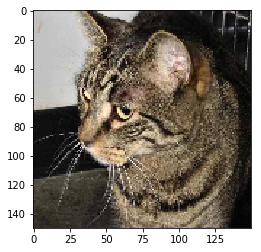

In [75]:
plt.imshow(img_tensor[0])
plt.show()

In [77]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input,outputs=layer_outputs)

In [78]:
activations = activation_model.predict(img_tensor)

In [80]:
first_layer_activation = activations[0]

In [81]:
print(first_layer_activation.shape)

(1, 148, 148, 32)


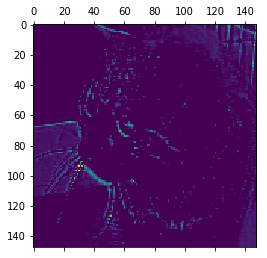

In [92]:
plt.matshow(first_layer_activation[0,:,:,23],cmap='viridis')

Visualising the 23rd filter activation in the first layer.

In [93]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)

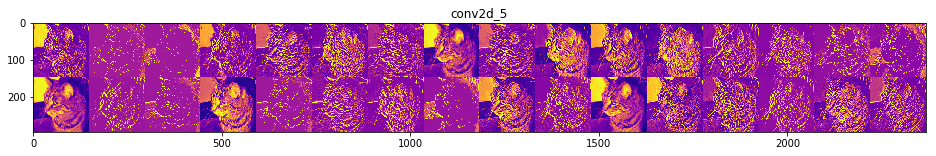

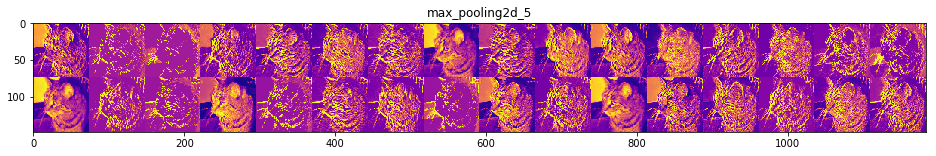

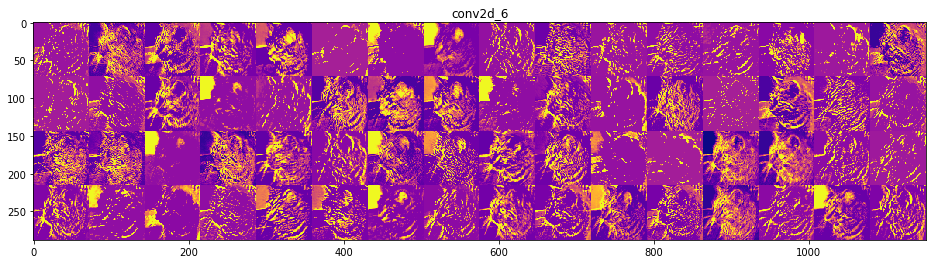

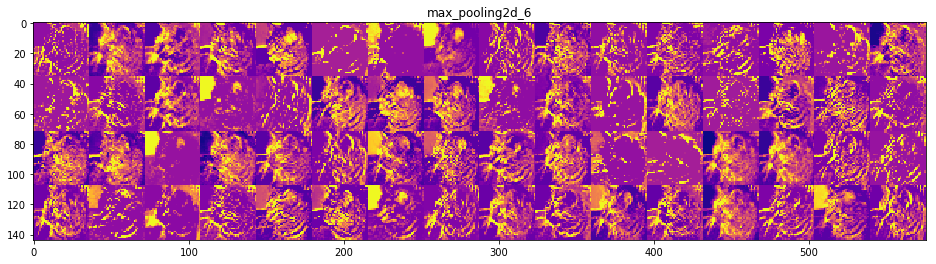

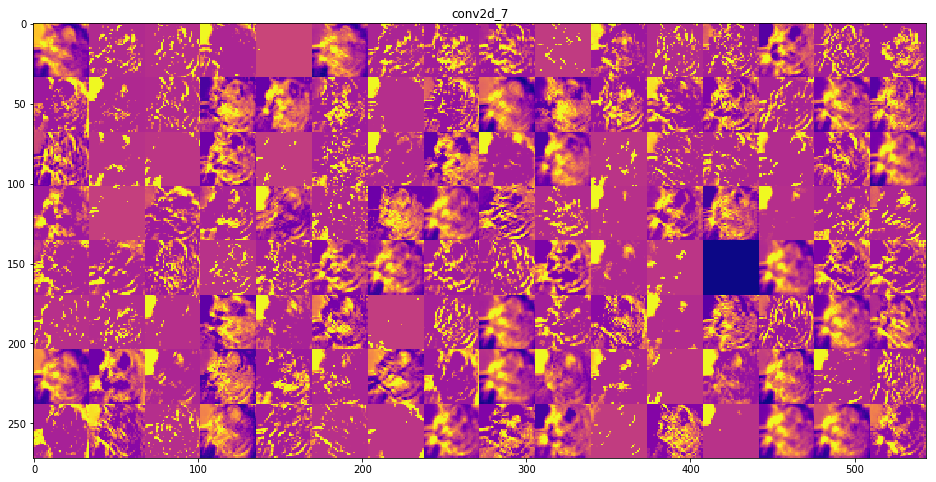

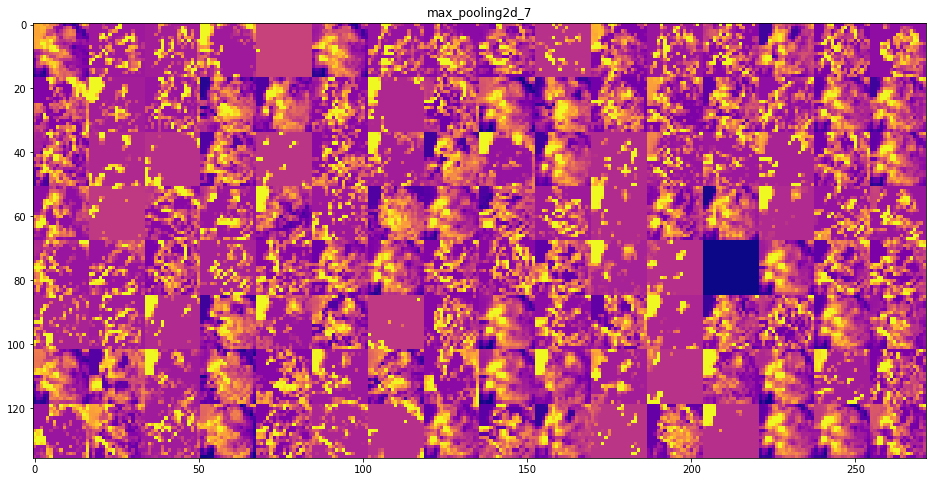

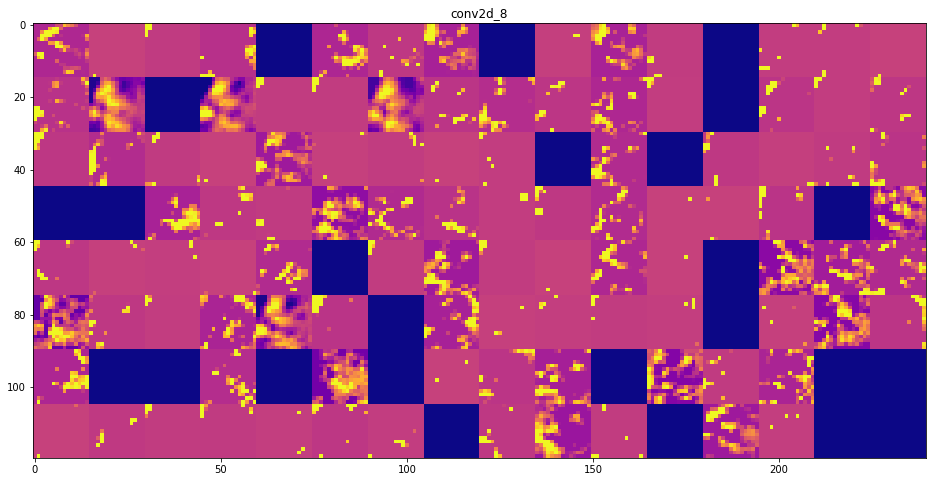

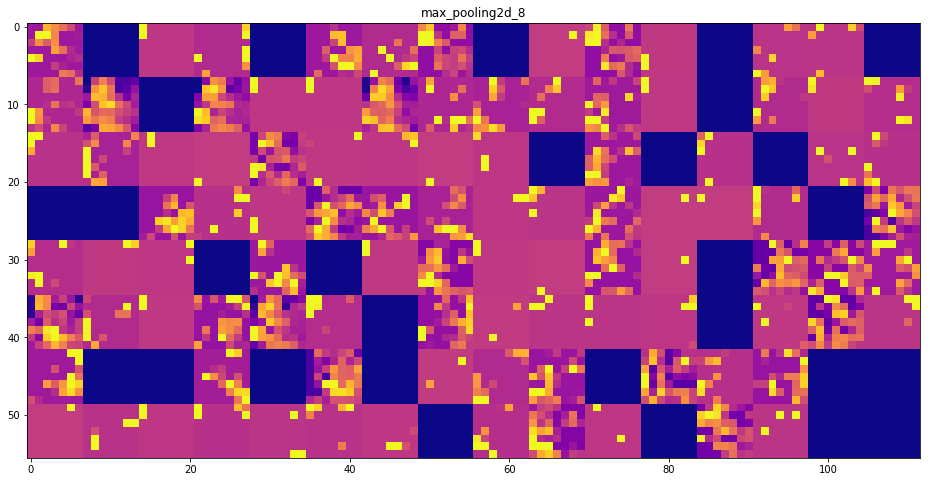

In [95]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1]    # Number of features in this layer
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    
    
    